In [246]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

In [247]:
import warnings
warnings.filterwarnings('ignore')

In [260]:
df = pd.read_csv('final\\f1.csv')
df_ = pd.read_csv('final\\f1.csv')
df = df.add_prefix("prefix_")
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [261]:
df = df.iloc[1: , :]
df_ = df.iloc[:-1, :]

In [265]:
result = pd.concat([df, df_])
result

,words,key_hold_duration,interval
1,72,111 ms,-102.0
2,65,45 ms,-112.0
3,84,106 ms,-105.0
4,32,0 ms,-91.0
5,87,101 ms,-109.0
...,...,...,...
464,79,53 ms,-148.0
465,32,50 ms,-53.0
466,76,34 ms,-137.0
467,79,40 ms,-151.0


In [250]:
df.dropna()
df.interval = df.interval.abs()
df.describe()

,words,interval
count,469.000000,469.000000
mean,68.439232,127.390192
std,28.930861,88.835409
min,8.000000,4.000000
25%,65.000000,68.000000
50%,72.000000,102.000000
75%,82.000000,153.000000
max,222.000000,582.000000


In [251]:
df['key_hold_duration'] = df['key_hold_duration'].str[:-3]
df['key_hold_duration'] = df['key_hold_duration'].astype('int')
df

,words,key_hold_duration,interval
1,72,111,102.0
2,65,45,112.0
3,84,106,105.0
4,32,0,91.0
5,87,101,109.0
...,...,...,...
465,32,50,53.0
466,76,34,137.0
467,79,40,151.0
468,79,58,320.0


,words,key_hold_duration,interval
0,8,54.307692,256.692308
1,32,17.224719,82.921348
2,65,55.600000,109.775000
3,66,65.250000,186.416667
4,67,78.222222,224.888889
5,68,60.200000,155.800000
6,69,50.300000,91.875000
7,70,69.833333,123.666667
8,71,49.666667,90.000000
9,72,62.400000,122.450000


<AxesSubplot:xlabel='interval', ylabel='key_hold_duration'>

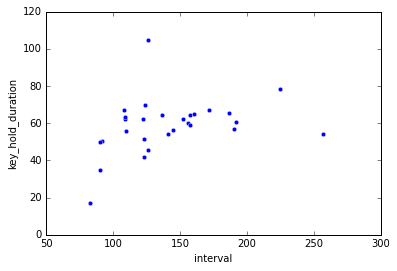

In [154]:
#sns.distplot(df['key_hold_duration'])
#sns.distplot(df['interval'])
sns.scatterplot(x=df_['interval'],y=df_['key_hold_duration'])

In [155]:
X = df_.drop(['words'],axis=1)

In [156]:
X

,key_hold_duration,interval
0,54.307692,256.692308
1,17.224719,82.921348
2,55.600000,109.775000
3,65.250000,186.416667
4,78.222222,224.888889
5,60.200000,155.800000
6,50.300000,91.875000
7,69.833333,123.666667
8,49.666667,90.000000
9,62.400000,122.450000


In [157]:
from sklearn.cluster import KMeans
dis = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = kmeans.fit(X)
    dis.append(kmeans.inertia_)

In [158]:
last = 1
for i in dis:
    print(i/last)
    last = i

22094.297435078413
0.5785161501338119
0.6548540075582274
0.6945163581669956
0.6478802655240183
0.7897999234494658
0.7295379058832497
0.714651275251472


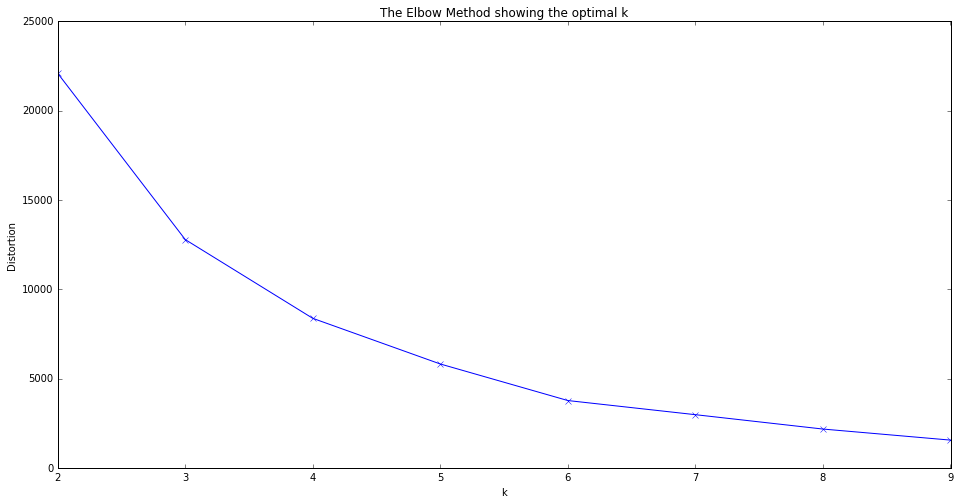

In [159]:
plt.figure(figsize=(16,8))
plt.plot(range(2,10), dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clusters = kmeans.predict(X)
dfclus = df_.copy()
dfclus['clusters'] = clusters

In [161]:
import pickle
pickle.dump(kmeans, open("xav.pkl", "wb"))

<AxesSubplot:xlabel='interval', ylabel='key_hold_duration'>

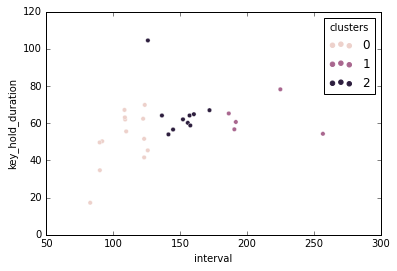

In [164]:
sns.scatterplot(x=dfclus['interval'],y=dfclus['key_hold_duration'],hue=dfclus['clusters'])

In [165]:
average = dfclus.groupby('clusters').mean().reset_index()
average

,clusters,words,key_hold_duration,interval
0,0,73.153846,51.584411,108.425452
1,1,87.200000,63.034771,210.041997
2,2,100.900000,65.628571,150.374524


In [166]:
pk = []
pi = []
for index, row in dfclus.iterrows():
    av = average[average['clusters'] == int(row['clusters'])]
    to_add = row['key_hold_duration']/av['key_hold_duration'].values[0]
    pk.append(to_add)
    to_add = row['interval']/av['interval'].values[0]
    pi.append(to_add)

In [167]:
dfclus['PrecentageKEY'] = pk
dfclus['PrecentageINT'] = pi

In [168]:
dfclus.to_csv("xavier_profile.csv")

In [76]:
profile = pd.read_csv('xavier_profile.csv')
test =  pd.read_csv('final\\f.csv')

In [241]:
profile = pd.read_csv('xavier_profile.csv')
profile.drop(['Unnamed: 0'], axis = 1, inplace = True)
test =  pd.read_csv('final\\f.csv')
test = test.iloc[1: , :]
test.dropna()
test.interval = test.interval.abs()
test['key_hold_duration'] = test['key_hold_duration'].str[:-3]
test['key_hold_duration'] = test['key_hold_duration'].astype('int')
average = profile.groupby('clusters').mean().reset_index()
kmeans = pickle.load(open("xav.pkl", "rb"))
X = test.drop(['words'],axis=1)
clusters = kmeans.predict(X)
test['clusters'] = clusters
pk = []
pi = []
for index, row in test.iterrows():
    av = average[average['clusters'] == int(row['clusters'])]
    to_add = row['key_hold_duration']/av['key_hold_duration'].values[0]
    pk.append(to_add)
    to_add = row['interval']/av['interval'].values[0]
    pi.append(to_add)
test['PrecentageKEY'] = pk
test['PrecentageINT'] = pi

#remove words from test not in profile
ut = test.words.unique()
up = profile.words.unique()
for i in ut:
    if not(i in up):
        test = test[test['words'] != i]

#count clusters from test
dic = {}
for index, row in profile.iterrows():
    cp = str(int(row['words'])) + 'cp'
    cn = str(int(row['words'])) + 'cn'
    dic[cp] = 0
    dic[cn] = 0
for index, row in test.iterrows():
    clu = profile[profile['words']==row['words']]
    if not(clu['clusters'].values[0] == row['clusters']):
        cn = str(int(row['words'])) + 'cn'
        countnow = dic[cn]
        countnow += 1
        dic[cn] = countnow
    else:
        cp = str(int(row['words'])) + 'cp'
        countnow = dic[cp]
        countnow += 1
        dic[cp] = countnow

#create precentages
dicn = {}
vaal = []
done = 1
per = []
for key in dic:
    if done:
        val = str(key)
        if val[-1] == 'n':
            val = val.replace('cn','')
        else:
            val = val.replace('cp','')
        val = int(val)
        vaal.append(val)
        neg = dic[key]
        done = 0
    else:
        pos = dic[key]
        pre = pos/(pos+neg)
        per.append(pre)
        done = 1
to_add = dict(zip(vaal, per))
profile['Percentages'] = profile['words'].map(to_add)


In [245]:
profile.Percentages.mean()

0.5647186820689124

In [200]:
profile

,words,key_hold_duration,interval,clusters,PrecentageKEY,PrecentageINT
0,8,54.307692,256.692308,1,0.861551,1.222100
1,32,17.224719,82.921348,0,0.333913,0.764778
2,65,55.600000,109.775000,0,1.077845,1.012447
3,66,65.250000,186.416667,1,1.035143,0.887521
4,67,78.222222,224.888889,1,1.240938,1.070685
5,68,60.200000,155.800000,2,0.917283,1.036080
6,69,50.300000,91.875000,0,0.975101,0.847356
7,70,69.833333,123.666667,0,1.353768,1.140569
8,71,49.666667,90.000000,0,0.962823,0.830063
9,72,62.400000,122.450000,0,1.209668,1.129347


In [204]:
ut = test.words.unique()
up = profile.words.unique()
for i in ut:
    if not(i in up):
        test = test[test['words'] != i]

In [224]:
dic

{'8cp': 13,
 '8cn': 13,
 '32cp': 68,
 '32cn': 10,
 '65cp': 24,
 '65cn': 7,
 '66cp': 3,
 '66cn': 7,
 '67cp': 4,
 '67cn': 5,
 '68cp': 3,
 '68cn': 3,
 '69cp': 42,
 '69cn': 7,
 '70cp': 3,
 '70cn': 4,
 '71cp': 3,
 '71cn': 0,
 '72cp': 14,
 '72cn': 4,
 '73cp': 3,
 '73cn': 22,
 '74cp': 0,
 '74cn': 1,
 '75cp': 1,
 '75cn': 2,
 '76cp': 6,
 '76cn': 14,
 '77cp': 1,
 '77cn': 8,
 '78cp': 3,
 '78cn': 17,
 '79cp': 6,
 '79cn': 18,
 '80cp': 2,
 '80cn': 7,
 '82cp': 15,
 '82cn': 6,
 '83cp': 24,
 '83cn': 18,
 '84cp': 10,
 '84cn': 26,
 '85cp': 3,
 '85cn': 3,
 '86cp': 0,
 '86cn': 2,
 '87cp': 9,
 '87cn': 5,
 '89cp': 0,
 '89cn': 3,
 '188cp': 3,
 '188cn': 3,
 '190cp': 3,
 '190cn': 4,
 '222cp': 1,
 '222cn': 1}

In [235]:
#remove words from test not in profile
ut = test.words.unique()
up = profile.words.unique()
for i in ut:
    if not(i in up):
        test = test[test['words'] != i]

#count clusters from test
dic = {}
for index, row in profile.iterrows():
    cp = str(int(row['words'])) + 'cp'
    cn = str(int(row['words'])) + 'cn'
    dic[cp] = 0
    dic[cn] = 0
for index, row in test.iterrows():
    clu = profile[profile['words']==row['words']]
    if not(clu['clusters'].values[0] == row['clusters']):
        cn = str(int(row['words'])) + 'cn'
        countnow = dic[cn]
        countnow += 1
        dic[cn] = countnow
    else:
        cp = str(int(row['words'])) + 'cp'
        countnow = dic[cp]
        countnow += 1
        dic[cp] = countnow

#create precentages
dicn = {}
vaal = []
done = 1
per = []
for key in dic:
    if done:
        val = str(key)
        if val[-1] == 'n':
            val = val.replace('cn','')
        else:
            val = val.replace('cp','')
        val = int(val)
        vaal.append(val)
        neg = dic[key]
        done = 0
    else:
        pos = dic[key]
        pre = pos/(pos+neg)
        per.append(pre)
        done = 1
to_add = dict(zip(vaal, per))
profile['Precenatges'] = profile['words'].map(to_add)


In [238]:
profile.head()

,words,key_hold_duration,interval,clusters,PrecentageKEY,PrecentageINT,Precenatges
0,8,54.307692,256.692308,1,0.861551,1.222100,0.500000
1,32,17.224719,82.921348,0,0.333913,0.764778,0.128205
2,65,55.600000,109.775000,0,1.077845,1.012447,0.225806
3,66,65.250000,186.416667,1,1.035143,0.887521,0.700000
4,67,78.222222,224.888889,1,1.240938,1.070685,0.555556


In [20]:
df["key"] = df["start letter"] + df["end letter"]

KeyError: 'start letter'

In [ ]:
df.drop(['start letter','end letter'],axis =1, inplace=True)

In [ ]:
dfclean = df.groupby('key').mean().reset_index()

<AxesSubplot:xlabel='ms', ylabel='Density'>

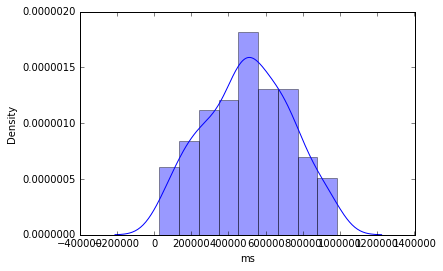

In [8]:
sns.distplot(dfclean['ms'])

In [9]:
from scipy.cluster.vq import kmeans, vq
y = dfclean['ms']
codebook, _ = kmeans(y, 3)
cluster_indices, _ = vq(y, codebook)
dfclean['cluster'] = cluster_indices

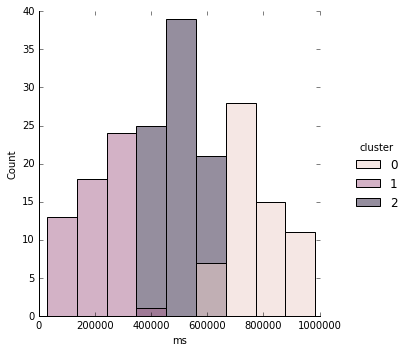

In [20]:
sns.displot(x=dfclean['ms'],hue=dfclean['cluster'])

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [23]:
dis = []
for i in range(1,10):
    codebook, distortion = kmeans(y, i)
    dis.append(distortion)

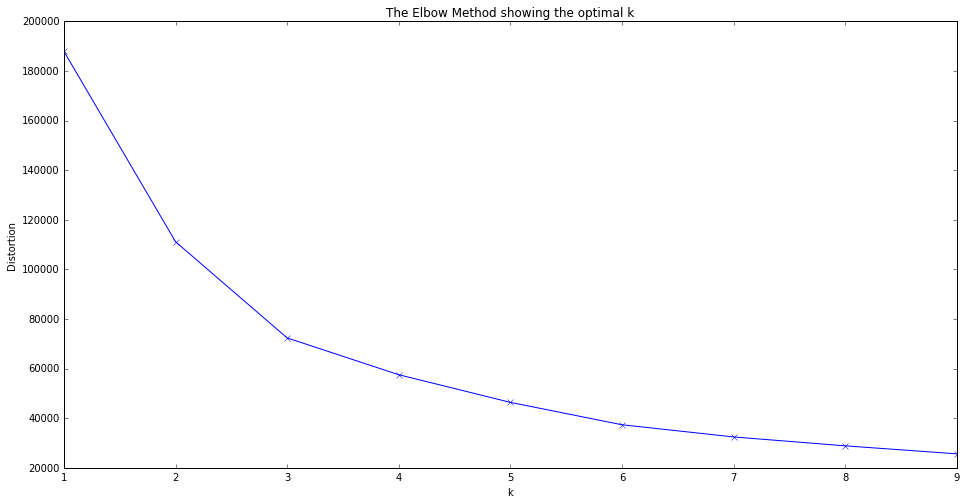

In [24]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
average = dfclean.groupby('cluster').mean().reset_index()
average

,cluster,ms
0,0,765020.723568
1,1,210128.911818
2,2,494244.086317


In [11]:
dfclean.head()

,key,ms,cluster
0,'e,716292.0,0
1,",,",944222.0,0
2,",a",687676.0,0
3,",backspace",500027.0,2
4,",shift",179790.0,1


In [13]:
pi = []
for index, row in dfclean.iterrows():
    av = average[average['clusters'] == int(row['clusters'])]
    to_add = row['key_hold_duration']/av['key_hold_duration'].values[0]
    pk.append(to_add)
    to_add = row['interval']/av['interval'].values[0]
    pi.append(to_add)

,key,ms,cluster
0,'e,716292.0,0
1,",,",944222.0,0
2,",a",687676.0,0
3,",backspace",500027.0,2
4,",shift",179790.0,1
...,...,...,...
197,we,624219.0,0
198,wh,427966.5,2
199,wi,204099.0,1
200,wspace,782064.0,0


In [12]:
newdf = dfclean.copy()
final = pd.DataFrame()
dic = {}
for index, row in newdf.iterrows():
    clusl = str(row['cluster']) + "Label"
    clusp = str(row['cluster']) + "Precentage"
    try:
        #print(clusl)
        print("dic clusl",dic[clusl])
        to_add_str = row['key']
        liz = dic[clusl]
        print("liz,add",liz,to_add_str)
        ad = liz.append(str(to_add_str))
        print("ad",ad)
        to_add = {clusl:ad}
        print("toadd",to_add)
        dic.update(to_add)
        print("after update",dic)
    except Exception as e:
        print('added',e)
        dic[clusl] = [row['key']]
        print("DIC",dic)

added '0Label'
DIC {'0Label': ["'e"]}
dic clusl ["'e"]
liz,add ["'e"] ,,
ad None
toadd {'0Label': None}
after update {'0Label': None}
dic clusl None
liz,add None ,a
added 'NoneType' object has no attribute 'append'
DIC {'0Label': [',a']}
added '2Label'
DIC {'0Label': [',a'], '2Label': [',backspace']}
added '1Label'
DIC {'0Label': [',a'], '2Label': [',backspace'], '1Label': [',shift']}
dic clusl [',backspace']
liz,add [',backspace'] ,space
ad None
toadd {'2Label': None}
after update {'0Label': [',a'], '2Label': None, '1Label': [',shift']}
dic clusl [',a']
liz,add [',a'] .space
ad None
toadd {'0Label': None}
after update {'0Label': None, '2Label': None, '1Label': [',shift']}
dic clusl [',shift']
liz,add [',shift'] Ashift
ad None
toadd {'1Label': None}
after update {'0Label': None, '2Label': None, '1Label': None}
dic clusl None
liz,add None Dd
added 'NoneType' object has no attribute 'append'
DIC {'0Label': None, '2Label': None, '1Label': ['Dd']}
dic clusl None
liz,add None Gg
added 'None

In [36]:
dic

{'0Label': ['wspace'], '2Label': ['ww'], '1Label': None}

In [5]:
#Hard to reach characters
check = df.loc[df['start letter'] == 'w']
check

,ms,start letter,end letter,key
79,436171,w,h,wh
217,204099,w,i,wi
259,624219,w,e,we
318,347734,w,w,ww
319,419762,w,h,wh
331,656343,w,w,ww
332,782064,w,space,wspace


In [64]:
df['ms'] = np.where(df['start letter'] == 'W', df['ms'] + 2000, df['ms'])
df['ms'] = np.where(df['start letter'] == 'Q', df['ms'] + 2500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'A', df['ms'] + 2200, df['ms'])
df['ms'] = np.where(df['start letter'] == 'S', df['ms'] + 2000, df['ms'])

df['ms'] = np.where(df['start letter'] == 'R', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'F', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'V', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'B', df['ms'] - 500, df['ms'])

In [76]:
df

,ms,start letter,end letter
0,83663,s,n
1,192002,n,n
2,796296,n,w
3,763871,w,y
4,855389,y,u
...,...,...,...
494,455554,s,t
495,603656,t,t
496,743165,t,y
497,979706,y,space


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["st"] = le.fit_transform(df["start letter"])
df["el"] = le.fit_transform(df["end letter"])

In [113]:
st = pd.get_dummies(df["start letter"])
st = st.add_prefix("st_")
el = pd.get_dummies(df["end letter"])
el = el.add_prefix("el_")
df = pd.concat([df,el,st], axis=1, join='inner')

In [132]:
y = df.ms.copy()
X = df.drop(['ms','start letter','end letter'], axis = 1) 

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [134]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [135]:
from sklearn.metrics import mean_squared_error
print(clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.029701390153512697
74125975852.33066


In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [83]:
r_sq = reg.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")
reg.predict([[22,0]])

coefficient of determination: 0.00833929865334282
intercept: 496334.79990113794
slope: [ 3366.15459032 -2021.72956296]


In [86]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

In [87]:
r_sq = reg.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")
reg.predict([[22,0]])

coefficient of determination: 0.008339298653337823
intercept: 496334.7994432284
slope: [ 3366.15241988 -2021.72737955]


array([570390.15268067])